## Main Objective
An online bookstore is looking to optimize its website design to improve user engagement and ultimately increase book purchases. The website currently offers two themes for its users: “Light Theme” and “Dark Theme.” The bookstore’s data science team wants to **conduct an A/B testing experiment to determine which theme leads to better user engagement and higher conversion rates for book purchases**.

> Identifying which theme, Light Theme or Dark Theme, yields better user engagement, purchases and conversion rates and also determining if there is a statistically significant difference in the key metrics between the two themes.

### Data Understanding
The data collected by the bookstore contains user interactions and engagement metrics for both the Light Theme and Dark Theme. The dataset includes the following key features:

1. **Theme**: dark or light
2. **Click Through Rate**: The proportion of the users who click on links or buttons on the website.
3. **Conversion Rate**: The percentage of users who signed up on the platform after visiting for the first time.
4. **Bounce Rate**: The percentage of users who leave the website without further interaction after visiting a single page.
5. **Scroll Depth**: The depth to which users scroll through the website pages.
6. **Age**: The age of the user.
7. **Location**: The location of the user.
8. **Session Duration**: The duration of the user’s session on the website.
9. **Purchases**: Whether the user purchased the book (Yes/No).
10. **Added_to_Cart**: Whether the user added books to the cart (Yes/No).

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("datasets/website_ab_test.csv")

In [4]:
dataset.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [6]:
# Checking for null values
dataset.isnull().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

### Exploratory Data Analysis
#### How do the click-through rates compare between the Light Theme and Dark Theme?

In [9]:
# Calculate the average Click Through Rate for each theme
theme_ctr = dataset.groupby('Theme')['Click Through Rate'].mean().reset_index()

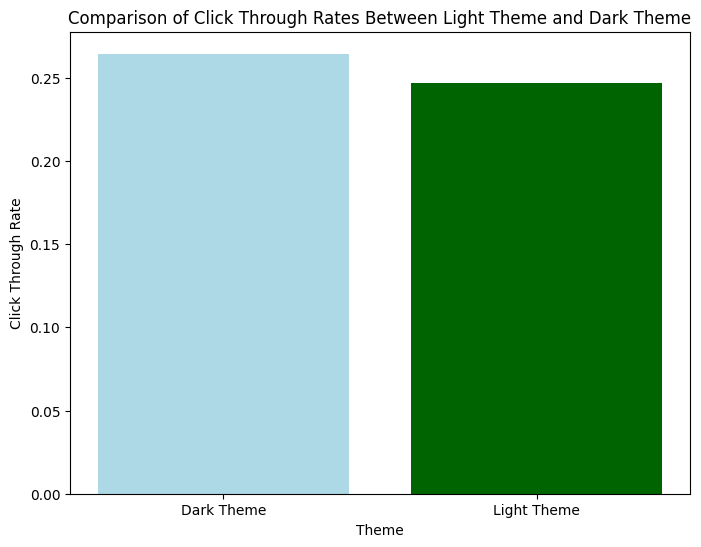

In [11]:
# Plot the comparison
plt.figure(figsize=(8, 6))
plt.bar(theme_ctr['Theme'], theme_ctr['Click Through Rate'], color=['lightblue', 'darkgreen'])
plt.xlabel('Theme')
plt.ylabel('Click Through Rate')
plt.title('Comparison of Click Through Rates Between Light Theme and Dark Theme')
plt.show()

> Dark Theme (0.30) has slightly higher average click through rate than Light Theme (0.25)!  

#### What's the difference in conversion rates between the two themes?

In [13]:
# Calculate the average Conversion Rate for each theme
theme_conversion_rate = dataset.groupby('Theme')['Conversion Rate'].mean().reset_index()

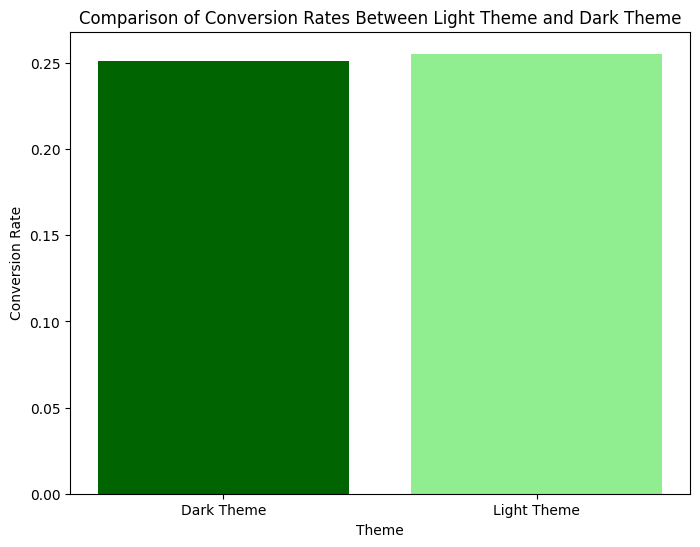

In [15]:
# Plot the comparison
plt.figure(figsize=(8, 6))
plt.bar(theme_conversion_rate['Theme'], theme_conversion_rate['Conversion Rate'], color=['darkgreen', 'lightgreen'])
plt.xlabel('Theme')
plt.ylabel('Conversion Rate')
plt.title('Comparison of Conversion Rates Between Light Theme and Dark Theme')
plt.show()

> The Light Theme average conversion rate (0.27) is slightly higher the Dark Theme average conversion rate (0.25)!

#### How do bounce rates vary between the Light Theme and Dark Theme?